In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

file = "ds_salaries (3).csv"
data = pd.read_csv(file)

data.keys()

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, )
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  # You can choose any classifier (e.g., Random Forest, Logistic Regression, etc.)
from sklearn.metrics import accuracy_score, classification_report




bins = np.linspace(min(data['salary_in_usd']), max(data['salary_in_usd']),4)
groupNames = ["low", "med", "high"]
data['SalGroup'] = pd.cut(data['salary_in_usd'], bins, labels = groupNames, include_lowest = True)
print(data)

data[['job_title' , 'salary_in_usd' , 'SalGroup']]

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

,job_title,salary_in_usd,SalGroup
0,Data Scientist,79833,low
1,Machine Learning Scientist,260000,med
2,Big Data Engineer,109024,low
3,Product Data Analyst,20000,low
4,Machine Learning Engineer,150000,low
...,...,...,...
602,Data Engineer,154000,low
603,Data Engineer,126000,low
604,Data Analyst,129000,low
605,Data Analyst,150000,low


In [17]:
for i in 'job_title':
    i = 'Data scientist'

X = data['work_year']
y = data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y = le.fit_transform(y)

In [18]:
data['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

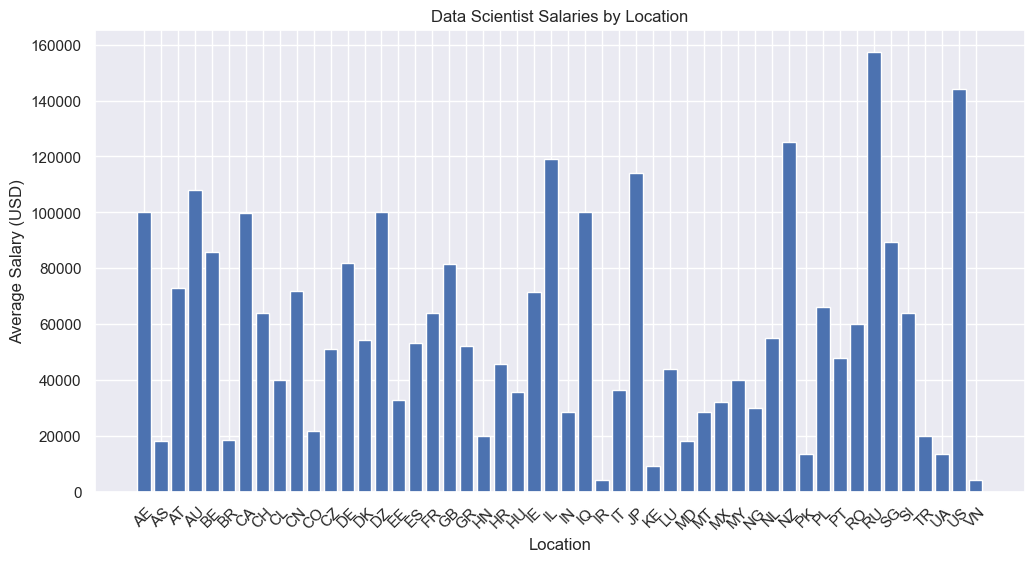

In [20]:
import matplotlib.pyplot as plt

for i in 'job_title':
    i = 'Data scientist'

data = pd.DataFrame(data)
subset_data = data[['company_location', 'salary_in_usd']]
mean_salary_by_location = subset_data.groupby('company_location')['salary_in_usd'].mean()


plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(mean_salary_by_location.index, mean_salary_by_location)  # Plot the bar chart
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.xlabel('Location')  # Set the x-axis label
plt.ylabel('Average Salary (USD)')  # Set the y-axis label
plt.title('Data Scientist Salaries by Location')  # Set the title
plt.show()  # Show the plot

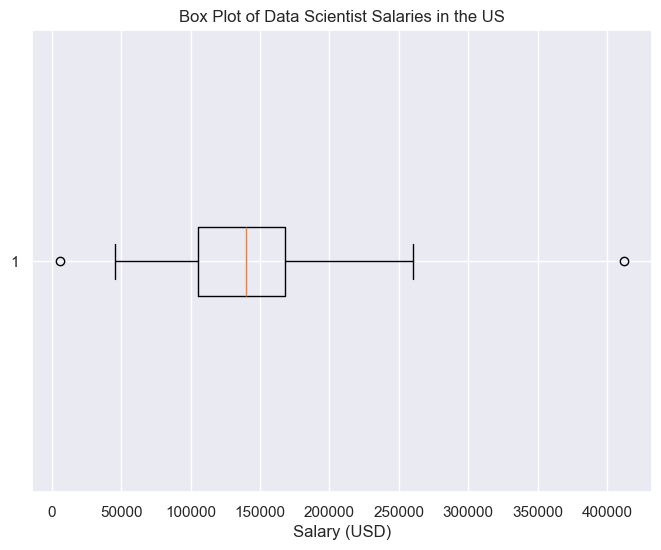

In [21]:
import matplotlib.pyplot as plt

# Filter the data for Data Scientist job title and US location
filtered_data = data[(data['job_title'] == 'Data Scientist') & (data['company_location'] == 'US')]

# Create a box plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot(filtered_data['salary_in_usd'], vert=False)  # Plot the box plot
plt.xlabel('Salary (USD)')  # Set the x-axis label
plt.title('Box Plot of Data Scientist Salaries in the US')  # Set the title
plt.show()  # Show the plot

Mean Absolute Error: 119.80327868852459


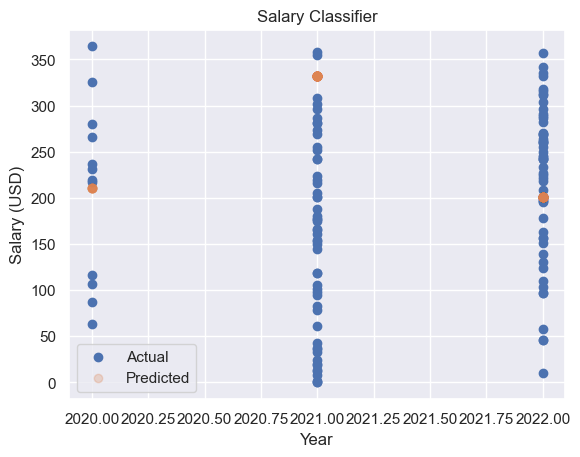

In [23]:

data = pd.DataFrame(data)

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier

X = data[['job_title']]  # Features
y = data['salary_in_usd']  # Target variable

le = LabelEncoder()
y = le.fit_transform(y)  # Encode target variable into numeric values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=10, max_depth=50, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)  # Calculate the mean absolute error
print("Mean Absolute Error:", mae)

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted', alpha=0.25)
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.title('Salary Classifier')
plt.legend()
plt.show()

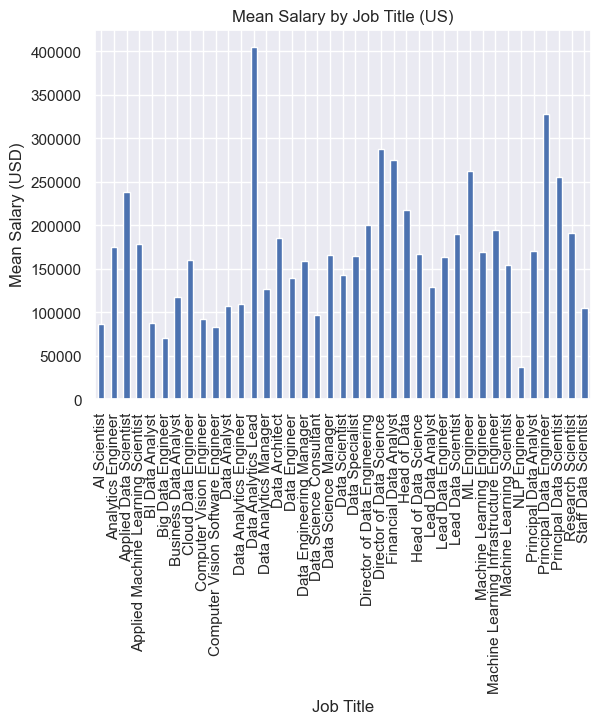

In [34]:
data = pd.DataFrame(data)
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for company_location = US
data_us = data[data['company_location'] == 'US']

# Group the data by job_title and calculate the mean salary
mean_salary = data_us.groupby('job_title')['salary_in_usd'].mean()

# Plot the graph
mean_salary.plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Job Title (US)')
plt.show()

In [35]:
# Filter the data for job_title = "Data Scientist"
filtered_data = data[data['job_title'] == 'Data Scientist']

# Group the data by company_location and compute the minimum and maximum salary_in_usd
grouped_data = filtered_data.groupby('company_location')['salary_in_usd'].agg(['min', 'max'])

# Print the minimum and maximum salary_in_usd for each company_location
print(grouped_data)



                     min     max
company_location                
AT                 61467   91237
AU                 86703   86703
BR                 12901   12901
CA                 52396  103691
CH                122346  122346
CL                 40038   40038
DE                 25532   90734
DZ                100000  100000
ES                 37825   46809
FR                 36643   77684
GB                 39263  183228
HU                 35735   35735
IL                119059  119059
IN                  9466   40481
IT                 21669   21669
LU                 62726   62726
MX                  2859    2859
MY                 40000   40000
NG                 50000   50000
PL                 35590   35590
TR                 20171   20171
UA                 13400   13400
US                  5679  412000
VN                  4000    4000


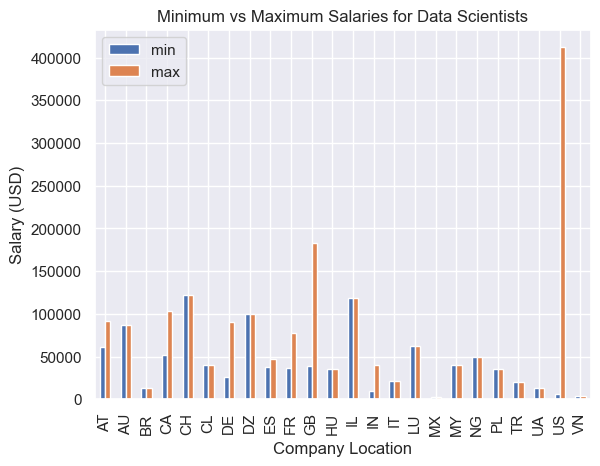

In [36]:
grouped_data.plot(kind='bar')
plt.xlabel('Company Location')
plt.ylabel('Salary (USD)')
plt.title('Minimum vs Maximum Salaries for Data Scientists')
plt.show()